In [45]:
import pandas as pd
import json
import ndjson
import dask.bag as db
from dask.diagnostics import ProgressBar
from textblob import TextBlob
import glob
import numpy as np
import seaborn as sns

In [97]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tmrlvi\AppData\Roaming\nltk_data...


True

In [119]:
from nltk.sentiment.sentiment_analyzer import SentimentAnalyzer
analyser = SentimentAnalyzer()

In [133]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [121]:
analyser.classify("Bad. Good.")

AttributeError: 'NoneType' object has no attribute 'classify'

In [2]:
tweets = pd.DataFrame(ndjson.load(open("D:/Research/causal_inference_data2/realDonaldTrump.ndjson")))

In [32]:
to_analyze = tweets[pd.isna(tweets["retweeted_status"]) & (~tweets["full_text"].str.startswith("https://t.co/"))]

In [27]:
r = tweets[tweets["source"] == '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>']

In [33]:
len(to_analyze)

403

In [134]:
#res = to_analyze["full_text"].apply(lambda x: pd.Series(TextBlob(x.lower()).sentiment, index=["polarity", "subjectivity"]))
res = to_analyze["full_text"].apply(lambda x: pd.Series([
    analyser.polarity_scores(x)["compound"],
    TextBlob(x.lower()).sentiment.subjectivity
], index=["polarity", "subjectivity"]))

In [135]:
all_res =pd.concat([to_analyze, res], axis=1)

In [136]:
sns.set_context("talk")

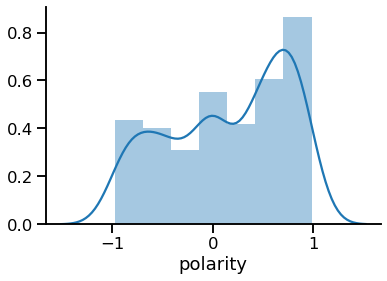

In [137]:
sns.distplot(res["polarity"])
sns.despine()

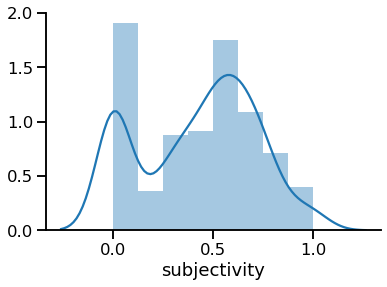

In [138]:
sns.distplot(res["subjectivity"])
sns.despine()

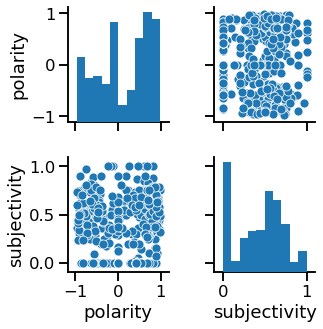

In [139]:
sns.pairplot(res)

In [140]:
to_analyze[res["polarity"] == 0.0]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities
0,Fri Jan 24 12:58:27 +0000 2020,1220692336881160193,1220692336881160193,"Cryin’ Chuck never had what it takes, and neve...",False,"[0, 53]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,"{'url': 'https://t.co/pQh4lXNCBN', 'expanded':...",{'created_at': 'Fri Jan 24 01:29:50 +0000 2020...,2061,6992,False,False,False,en,NaN,NaN
41,Fri Jan 24 11:42:37 +0000 2020,1220673252764332037,1220673252764332037,“He’s got to explain this. How did Hunter Bide...,False,"[0, 170]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,8878,30268,False,False,NaN,en,NaN,NaN
42,Fri Jan 24 11:24:48 +0000 2020,1220668770638876672,1220668770638876672,“21 State Attorney Generals denouncing the Imp...,False,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,5297,23948,False,False,NaN,en,NaN,NaN
50,Thu Jan 23 21:11:47 +0000 2020,1220454103937167361,1220454103937167361,"On my way, see you soon! https://t.co/6Rd5lbafJv",False,"[0, 24]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,"{'url': 'https://t.co/6Rd5lbafJv', 'expanded':...",{'created_at': 'Thu Jan 23 19:24:34 +0000 2020...,9617,40503,False,False,False,en,NaN,NaN
56,Thu Jan 23 21:01:35 +0000 2020,1220451535005671428,1220451535005671428,Close race in Kansas! https://t.co/m2ExF9vHKU,False,"[0, 21]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,5561,20575,False,False,False,en,NaN,"{'media': [{'id': 1220451519046139904, 'id_str..."
82,Wed Jan 22 22:04:40 +0000 2020,1220105021930426368,1220105021930426368,See you on Friday...Big Crowd! https://t.co/MF...,False,"[0, 30]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,"{'url': 'https://t.co/MFyWLG4HFZ', 'expanded':...",{'created_at': 'Thu Jan 31 17:28:15 +0000 2019...,25666,100317,False,False,False,en,NaN,NaN
99,Wed Jan 22 19:58:40 +0000 2020,1220073313768099840,1220073313768099840,“NO PRESSURE”,False,"[0, 13]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,21465,128351,False,False,NaN,en,NaN,NaN
215,Tue Jan 21 19:08:04 +0000 2020,1219698190129225728,1219698190129225728,READ THE TRANSCRIPTS!,False,"[0, 21]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,32963,175512,False,False,NaN,en,NaN,NaN
230,Mon Jan 20 18:53:02 +0000 2020,1219332022826606592,1219332022826606592,...And they say you can add 7% to 10% to all T...,False,"[0, 70]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,"{'url': 'https://t.co/Ta09xrAqUd', 'expanded':...",{'created_at': 'Thu Jan 16 21:50:50 +0000 2020...,20745,96516,False,False,False,en,NaN,NaN
239,Mon Jan 20 17:04:17 +0000 2020,1219304652438675456,1219304652438675456,USA! USA! USA!,False,"[0, 14]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,NaN,60078,322155,False,False,NaN,in,NaN,NaN


In [141]:
import pandas as pd

In [142]:
all_res.to_pickle("./trump_df_vader.pickle")